In [1]:
# Importarea bibliotecilor necesare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
# Citirea fișierului Ecommerce Customers CSV ca DataFrame numit customers
customers = pd.read_csv(r'C:\Users\Admin\Ecommerce Customers.csv')

In [55]:
# Afișați primele câteva linii ale DataFrame-ului
print('Acesta este header\n')
print(customers.head())

# Obțineți informații despre DataFrame folosind funcția info()
print('\n\nAcestea sunt informatiile prin info\n')
print(customers.info())

# Obțineți statistici descriptive despre DataFrame folosind funcția describe()
print('\n\nAcestea sunt informatiile prin describe\n')
print(customers.describe())

Acesta este header

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3     

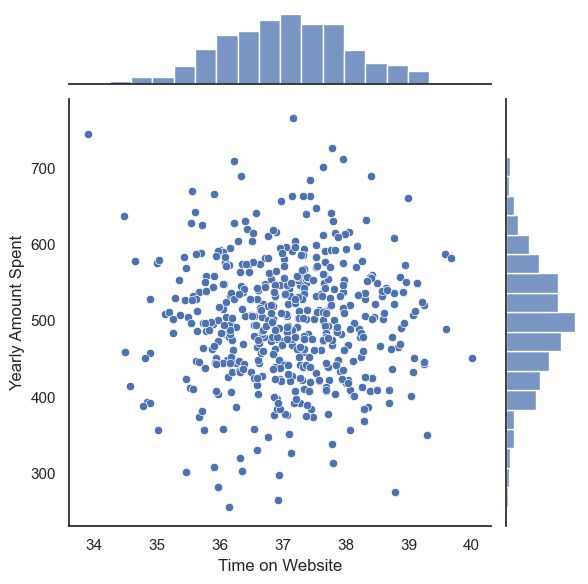

In [56]:
# Crearea diagramei comune (jointplot) pentru a compara coloanele Time on Website și Yearly Amount Spent
sns.set(style="white", color_codes=True)
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, kind='scatter')

plt.show()

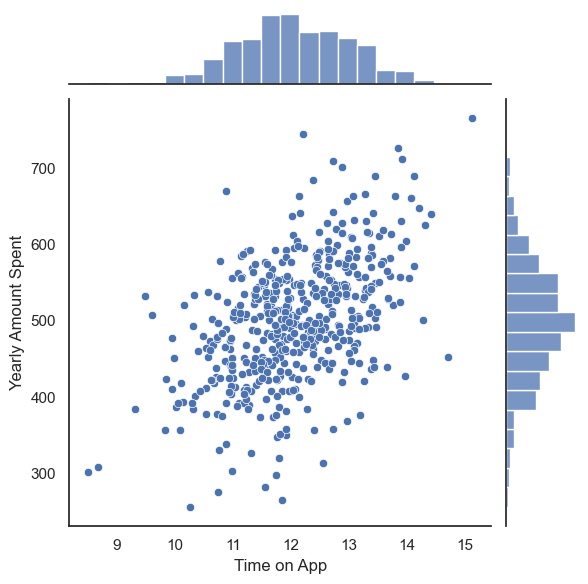

In [57]:
# Crearea diagramei comune (jointplot) pentru a compara coloanele Time on Website și Time on App
sns.set(style="white", color_codes=True)
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, kind='scatter')

# Afișați diagrama
plt.show()

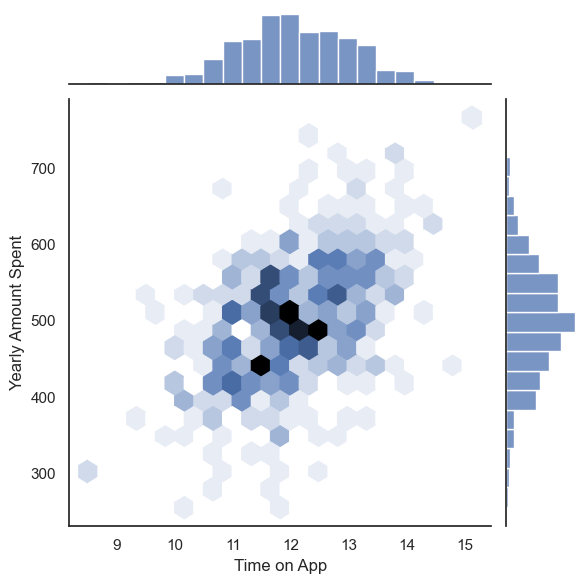

In [58]:
# Crearea diagramei comune (jointplot) pentru a compara coloanele Time on Website și Time on App cu diagrama 2D
sns.set(style="white", color_codes=True)
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, kind='hex')

plt.show()

In [7]:
# Crearea diagramei comune (jointplot) pentru a compara coloanele Time on Website și Time on App cu diagrama 2D
#  !!!!deviatia standard coeficientul de corelatie eroarea corelatiei
fig, axes = plt.subplots(5, 5, sharex=True, figsize=(15, 15))

sns.barplot(ax=axes[0,0], x='Avg. Session Length', y='Avg. Session Length', data=customers)
sns.scatterplot(ax=axes[0,1], x='Avg. Session Length', y='Time on App', data=customers)
sns.scatterplot(ax=axes[0,2], x='Avg. Session Length', y='Time on Website', data=customers)
sns.scatterplot(ax=axes[0,3], x='Avg. Session Length', y='Length of Membership', data=customers)
sns.scatterplot(ax=axes[0,4], x='Avg. Session Length', y='Yearly Amount Spent', data=customers)
for row in axes:
    for ax in row:
        ax.set_xlim([0, 37]) 
        ax.set_ylim([0, 37])

Error in callback <function flush_figures at 0x0000016A4E80A8E0> (for post_execute):


KeyboardInterrupt: 

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


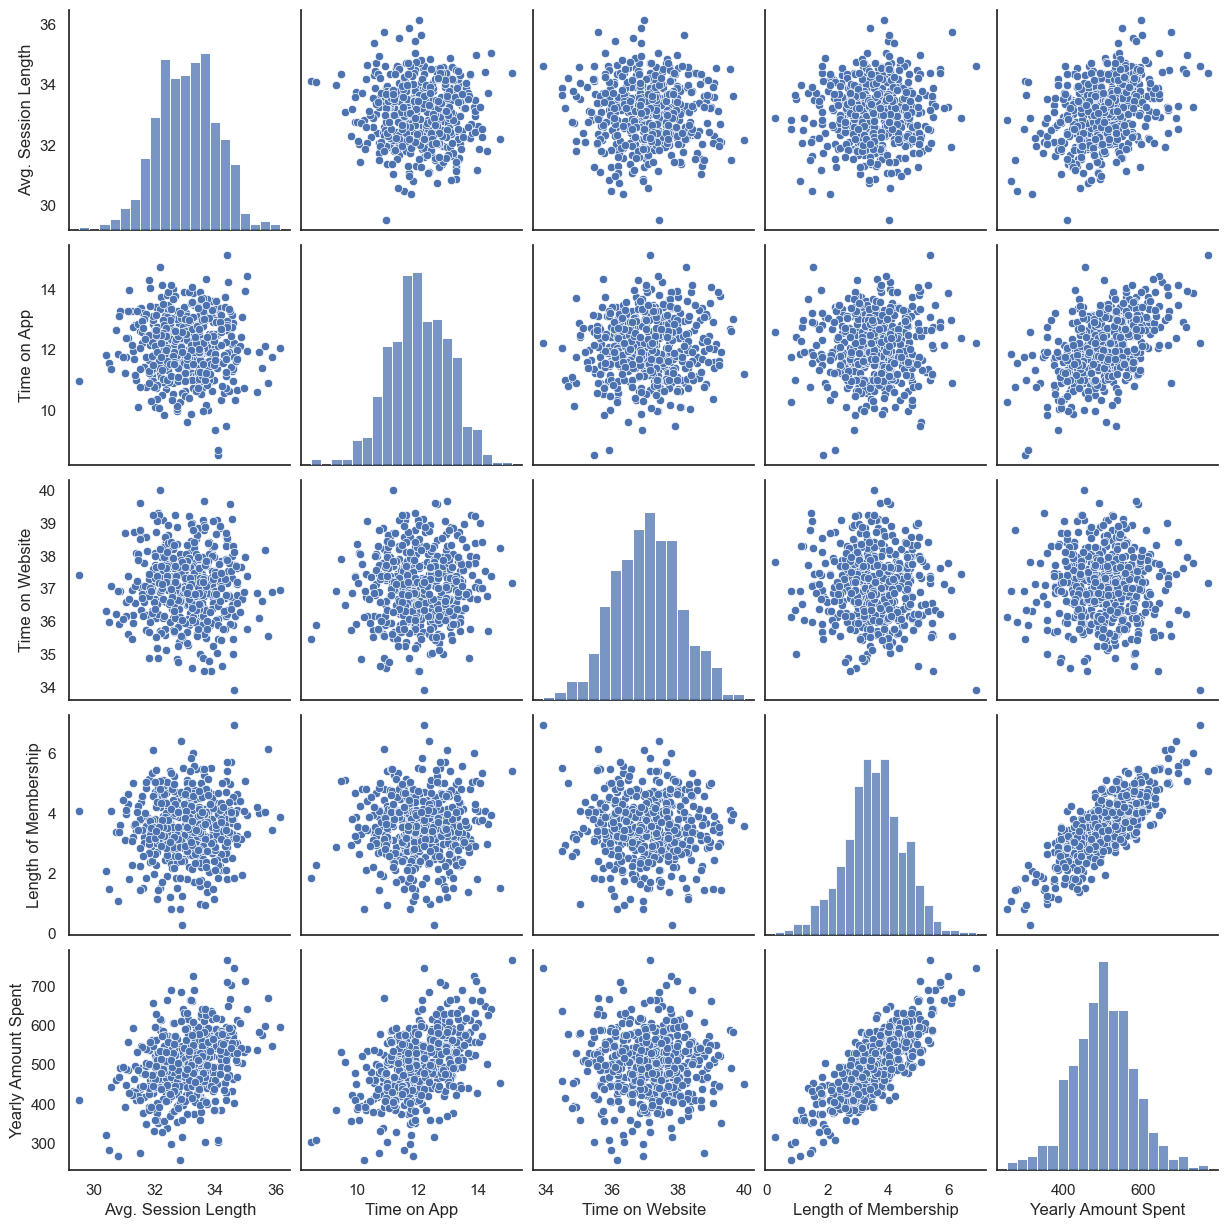

In [59]:
sns.pairplot(customers)

In [14]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

plt.show()

NameError: name 'customers' is not defined

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Pasul 8: Setarea variabilelor X și y
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [63]:
# Pasul 9: Împărțirea datelor în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Verificarea dimensiunilor seturilor de antrenament și testare
print("Dimensiunea setului de antrenament X:", X_train.shape)
print("Dimensiunea setului de testare X:", X_test.shape)
print("Dimensiunea setului de antrenament y:", y_train.shape)
print("Dimensiunea setului de testare y:", y_test.shape)

Dimensiunea setului de antrenament X: (350, 4)
Dimensiunea setului de testare X: (150, 4)
Dimensiunea setului de antrenament y: (350,)
Dimensiunea setului de testare y: (150,)


In [64]:
# Pasul 10: Importați LinearRegression din sklearn.linear_model.
from sklearn.linear_model import LinearRegression

In [65]:
# Pasul 11: Creați o instanță a unui model LinearRegression() numit lm.
lm = LinearRegression()
#Această linie va crea o instanță a modelului LinearRegression fără a specifica explicit 
#parametrii, deoarece valorile implicite sunt deja copy_X=True, fit_intercept=True, n_jobs=None și normalize=False.

In [66]:
# Pasul 12: Antrenați lm pe datele de antrenament.
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
# Pasul 13: Imprimați coeficienții modelului.
print("Coeficienții modelului sunt:")
print(lm.coef_)

Coeficienții modelului sunt:
[25.98154972 38.59015875  0.19040528 61.27909654]


In [68]:
# Pasul 14: Utilizați lm.predict() pentru a prezice setul X_test de date.
predictions = lm.predict(X_test)

predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

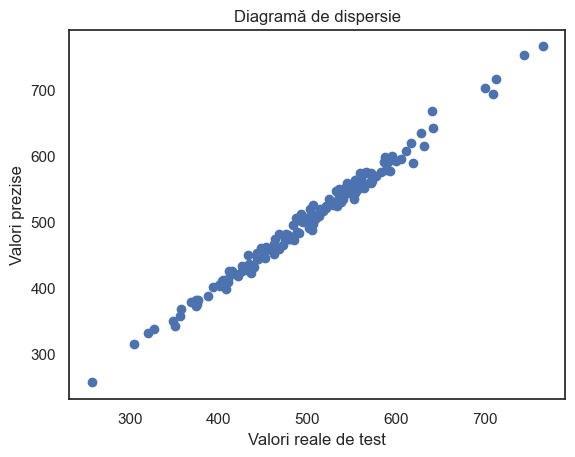

In [69]:
# Pasul 15: Creați o diagramă de dispersie a valorilor reale de test față de valorile prezise.
plt.scatter(y_test, predictions)
plt.xlabel("Valori reale de test")
plt.ylabel("Valori prezise")
plt.title("Diagramă de dispersie")
plt.show()

In [70]:
from sklearn import metrics
# Calcularea erorii medie absolute (MAE)
mae = metrics.mean_absolute_error(y_test, predictions)

# Calcularea erorii medie pătratice (MSE)
mse = metrics.mean_squared_error(y_test, predictions)

# Calcularea erorii medie pătratice rădăcină (RMSE)
rmse = metrics.mean_squared_error(y_test, predictions, squared=False)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 7.228148653430806
MSE: 79.8130516509741
RMSE: 8.933815066978614


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


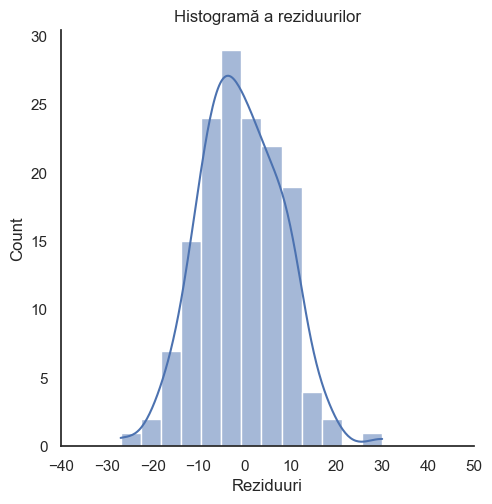

In [20]:
# Calcularea reziduurilor
residuals = y_test - predictions

# Trasarea histogramă folosind seaborn distplot
sns.displot(residuals, kde=True)
plt.xlabel('Reziduuri')
plt.xlim(-40, 50)
plt.title('Histogramă a reziduurilor')
plt.show()

In [21]:
data = {
    ' ': ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'],
    'Coefficient': [25.981550, 38.590159, 0.190405, 61.279097]
}

# Crearea unui cadru de date pandas
df = pd.DataFrame(data)

df

,,Coefficient
0,Avg. Session Length,25.981550
1,Time on App,38.590159
2,Time on Website,0.190405
3,Length of Membership,61.279097


In [22]:
Pentru a interpreta coeficienții unui model de regresie liniară este important să înțelegem cum aceștia afectează variabila dependentă, 
în cazul nostru, "Amount Spent" sau "Cheltuieli Anuale". În acest context:
1. Avg. Session Length (Durata Medie a Sesiunilor): Pentru fiecare unitate de creștere a duratei medii a sesiunilor de consiliere stil 
în magazin, se așteaptă o creștere de 25.981550 unități în cheltuielile anuale, menținând celelalte caracteristici constante.

2. Time on App (Timpul pe Aplicație): Pentru fiecare unitate de creștere a timpului mediu petrecut pe aplicație în minute, se așteaptă 
o creștere de 38.590159 unități în cheltuielile anuale, menținând celelalte caracteristici constante.

3. Time on Website (Timpul pe Site-ul Web): Pentru fiecare unitate de creștere a timpului mediu petrecut pe site-ul web în minute, se 
așteaptă o creștere de 0.190405 unități în cheltuielile anuale, menținând celelalte caracteristici constante.

4. Length of Membership (Durata Membru): Pentru fiecare unitate de creștere a duratei de membru în ani, se așteaptă o creștere de 61.279097 
unități în cheltuielile anuale, menținând celelalte caracteristici constante.

Interpretarea acestor coeficienți sugerează că există o corelație pozitivă între timpul petrecut pe aplicație, durata de membru și 
cheltuielile anuale. Cu cât un client petrece mai mult timp pe aplicație și este membru de mai mult timp, cu atât este mai probabil 
să cheltuiască mai mult.

Pentru întrebarea legată de concentrarea companiei pe aplicația mobilă sau pe site-ul web, bazându-ne strict pe coeficienții furnizați, pare 
să fie oportunități semnificative pentru a îmbunătăți experiența utilizatorului și angajamentul pe aplicația mobilă. Acest lucru se datorează 
faptului că coeficientul pentru "Time on App" este mult mai mare decât coeficientul pentru "Time on Website". Totuși, este important să se 
țină cont și de alte aspecte, cum ar fi feedback-ul utilizatorilor, tendințele pieței și obiectivele strategice ale companiei. 
O analiză mai detaliată ar putea oferi o imagine mai completă a direcției pe care ar trebui să o urmeze compania.

SyntaxError: invalid syntax (83772508.py, line 1)

In [2]:
file_path = r'C:\Users\Admin\obesity.csv'
obes = pd.read_csv(file_path)

In [3]:
# Afișați primele câteva linii ale DataFrame-ului
print('Acesta este header\n')
print(obes.head())

# Obțineți informații despre DataFrame folosind funcția info()
print('\n\nAcestea sunt informatiile prin info\n')
print(obes.info())

# Obțineți statistici descriptive despre DataFrame folosind funcția describe()
print('\n\nAcestea sunt informatiile prin describe\n')
print(obes.describe())

Acesta este header

   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56    Male  173.575262  71.982051  23.891783                      4   
1   69    Male  164.127306  89.959256  33.395209                      2   
2   46  Female  168.072202  72.930629  25.817737                      4   
3   32    Male  168.459633  84.886912  29.912247                      3   
4   60    Male  183.568568  69.038945  20.487903                      3   

  ObesityCategory  
0   Normal weight  
1           Obese  
2      Overweight  
3      Overweight  
4   Normal weight  


Acestea sunt informatiile prin info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   

In [4]:
print(obes.columns)

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')


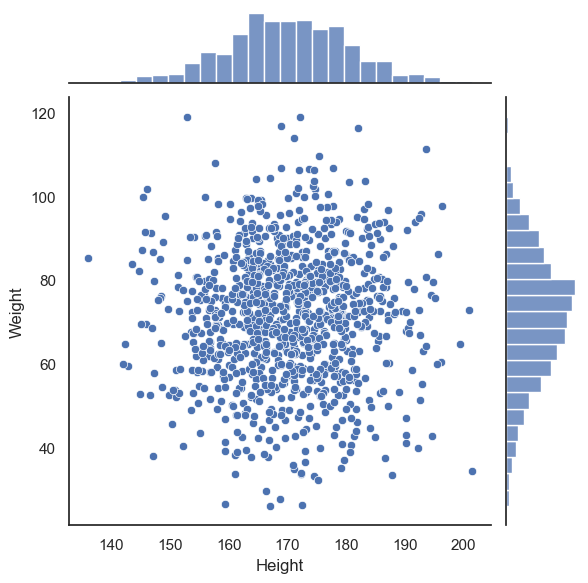

In [5]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='Height', y='Weight', data=obes, kind='scatter')

plt.show()

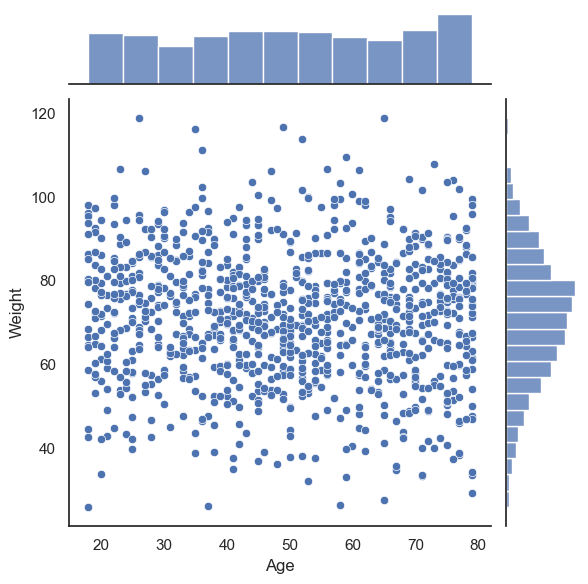

In [6]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='Age', y='Weight', data=obes, kind='scatter')

plt.show()

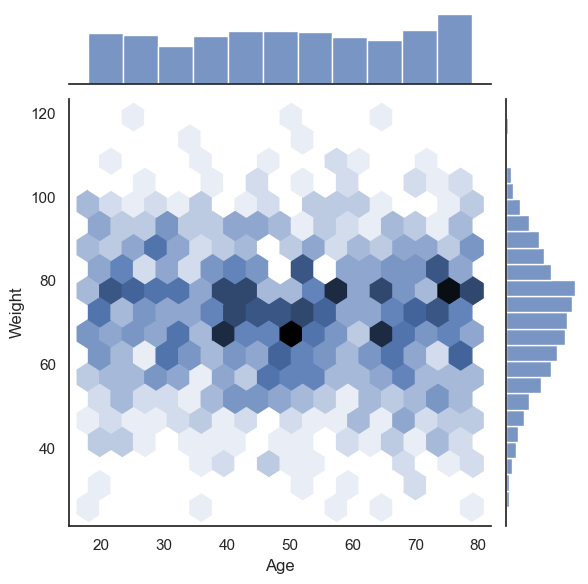

In [7]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='Age', y='Weight', data=obes, kind='hex')

plt.show()

In [8]:
# Replace 'male' with 1 and 'female' with 0
obes['Gender'] = obes['Gender'].replace({'Male': 1, 'Female': 0})
# Replace obesity categories with numerical values
obes['ObesityCategory'] = obes['ObesityCategory'].replace({
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obese': 3
})

obes

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,1
1,69,1,164.127306,89.959256,33.395209,2,3
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,1
...,...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4,2
996,35,0,165.076490,97.639771,35.830783,1,3
997,49,0,156.570956,78.804284,32.146036,1,3
998,64,1,164.192222,57.978115,21.505965,4,1


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


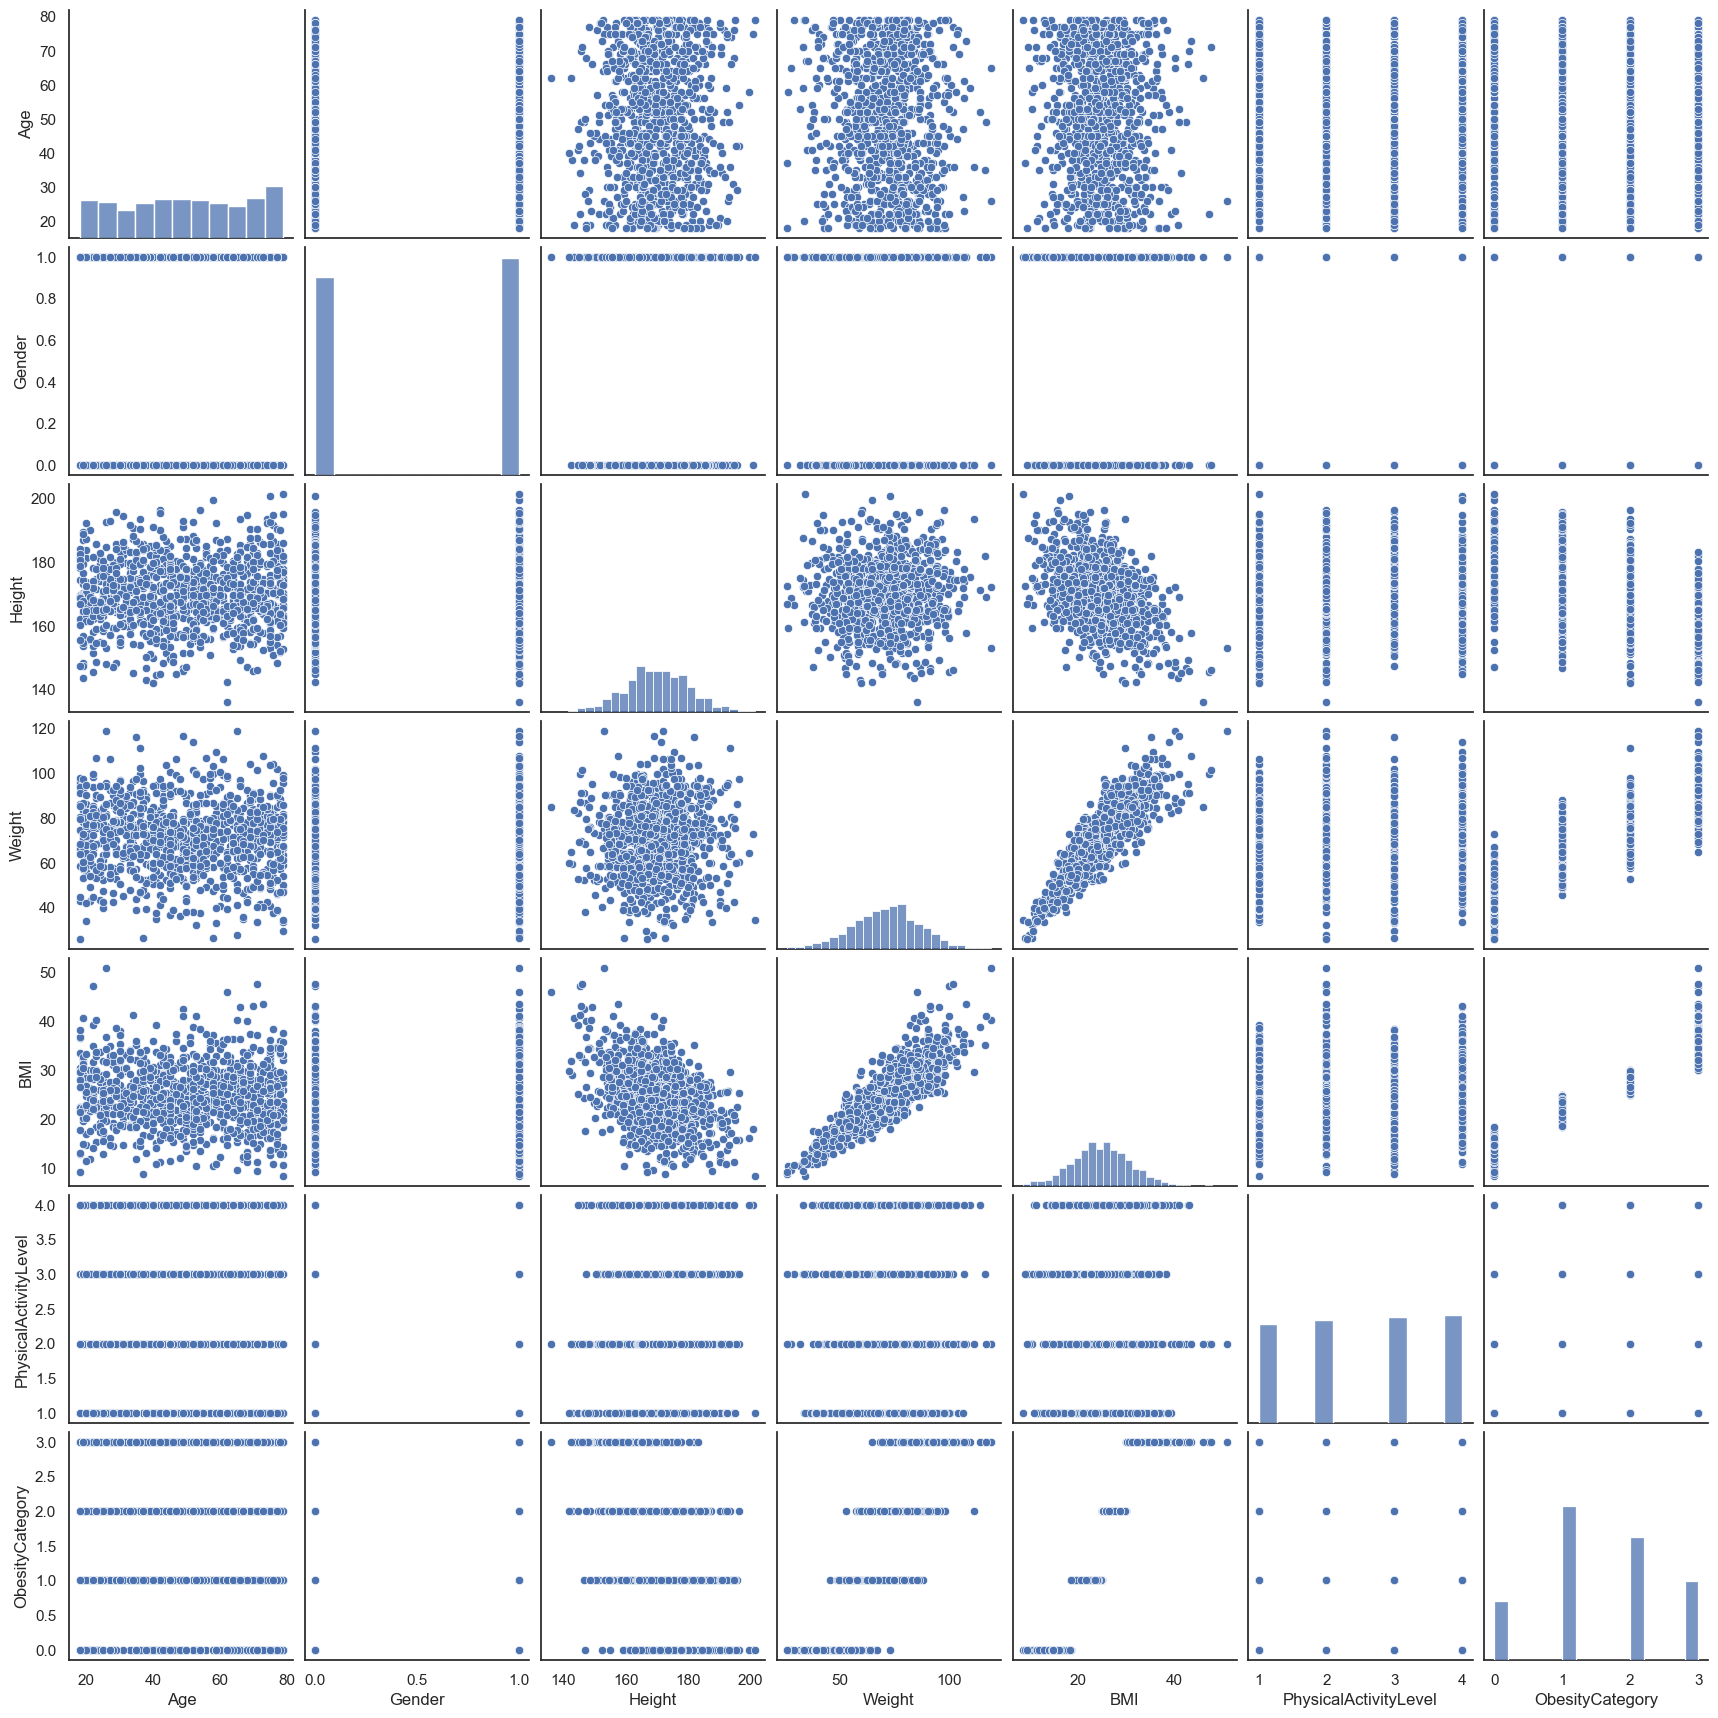

In [9]:
sns.pairplot(obes)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


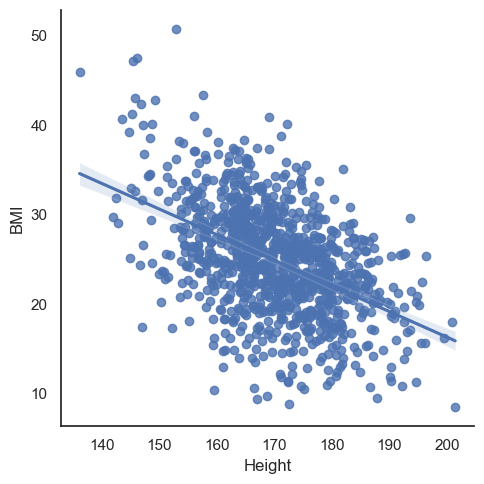

In [10]:
sns.lmplot(x='Height', y='BMI', data=obes)

plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


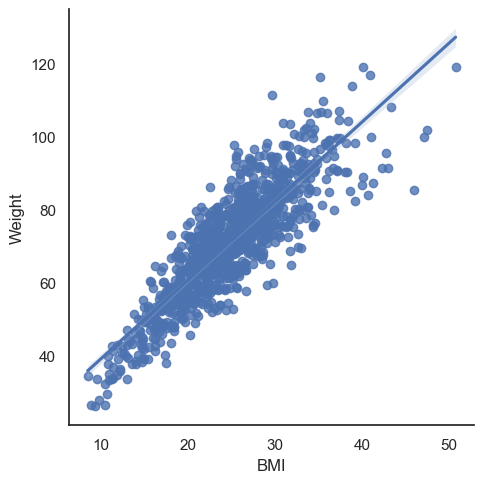

In [11]:
sns.lmplot(x='BMI', y='Weight', data=obes)

plt.show()

In [12]:
# Importarea bibliotecilor necesare
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
# Divizarea datelor în caracteristici (X) și variabila dependentă (y)
X1 = obes[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y1 = obes['ObesityCategory']

In [14]:
# Divizarea datelor în seturi de antrenare și de testare
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [15]:
# Antrenarea modelului de regresie liniar
model = LinearRegression()
model.fit(X_train1, y_train1)

LinearRegression()

In [16]:
# Realizarea predicțiilor pe setul de testare
predictions = model.predict(X_test1)

In [17]:
# Interpretați coeficienții modelului, dacă este necesar
print("Coeficienți:", model.coef_)

Coeficienți: [-0.00065271  0.00414198 -0.02532077  0.03465835  0.05048694 -0.00593829]


In [18]:
prediction = model.predict(X_test1)

prediction

array([ 1.93299993,  0.90116193,  1.66026587,  1.03854809,  2.08838961,
        2.07268509,  1.19054681,  0.99434414,  0.91959485,  0.65190727,
        0.02214417,  2.04752638,  2.65860503,  2.04011355,  1.45360548,
        1.09828922,  2.80522463,  0.98796312,  1.16224025,  2.00963302,
        2.72387778,  1.93694931,  1.87969091,  1.48395629,  2.90614919,
        3.18569725,  1.51877244,  2.35739799,  2.04646641,  2.39579465,
        1.51412203,  2.82025538,  0.03011923,  3.74917044,  1.27408389,
        1.10952032,  2.12143055,  2.1114462 ,  1.88298953, -0.67861705,
        2.05665362,  1.57599629,  2.2677097 ,  1.54169504,  1.08344336,
        2.14511234,  2.51909429,  1.37133419,  1.33521081,  0.7403853 ,
       -0.70902089,  0.6861272 ,  1.31081607,  0.96098434,  2.04844334,
       -0.1049325 ,  0.98647174,  0.50682556,  2.62492594,  2.27477254,
        0.88873381,  1.53133819,  1.56790159,  1.42632729,  2.75174015,
        0.64815786,  1.7964801 ,  2.52143444,  2.06914274,  1.69

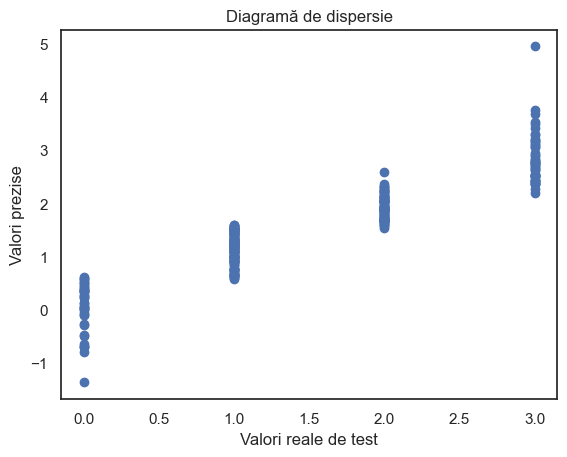

In [19]:
# Pasul 15: Creați o diagramă de dispersie a valorilor reale de test față de valorile prezise.
plt.scatter(y_test1, prediction)
plt.xlabel("Valori reale de test")
plt.ylabel("Valori prezise")
plt.title("Diagramă de dispersie")
plt.show()

In [20]:
from sklearn import metrics
# Calcularea erorii medie absolute (MAE). Reprezintă media valorilor absolute ale diferenței dintre predicțiile 
#modelului și valorile reale ale variabilei țintă.
mae = metrics.mean_absolute_error(y_test1, prediction)

# Calcularea erorii medie pătratice (MSE). Reprezintă media pătrată a diferenței dintre predicțiile modelului și 
#valorile reale ale variabilei țintă.
mse = metrics.mean_squared_error(y_test1, prediction)

# Calcularea erorii medie pătratice rădăcină (RMSE). Este radicalul din MSE și furnizează o măsură a erorii în unitățile originale ale variabilei țintă. 
rmse = metrics.mean_squared_error(y_test1, prediction, squared=False)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.28732616308666026
MSE: 0.12923554611812355
RMSE: 0.3594934576847311


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


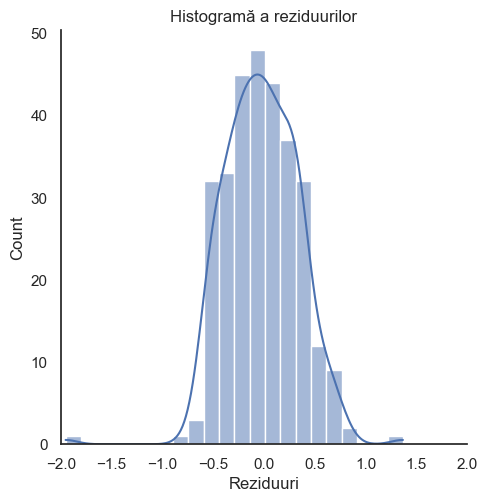

In [55]:
# Calcularea reziduurilor
residual = y_test1 - prediction

# Trasarea histogramă folosind seaborn distplot
sns.displot(residual, kde=True)
plt.xlabel('Reziduuri')
plt.xlim(-2, 2)
plt.title('Histogramă a reziduurilor')
plt.show()

In [58]:
data = {
    ' ': ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel'],
    'Coefficient': [-0.00065271, 0.00414198, -0.02532077, 0.03465835, 0.05048694, -0.00593829]
}

# Crearea unui cadru de date pandas
df = pd.DataFrame(data)

df

,,Coefficient
0,Age,-0.000653
1,Gender,0.004142
2,Height,-0.025321
3,Weight,0.034658
4,BMI,0.050487
5,PhysicalActivityLevel,-0.005938


In [ ]:
Vârsta (Age): Coeficientul este -0.000653. Deoarece coeficientul este negativ, creșterea vârstei este asociată cu o scădere 
a categoriei de obezitate.

Gen (Gender): Coeficientul este 0.004142. Acesta sugerează că ființele de sex masculin (sau orice altceva este codificat ca 1 
pentru 'male' și 0 pentru 'female') sunt mai predispuși către categorii mai mari de obezitate decât cele de sex feminin.

Înălțime (Height): Coeficientul este -0.025321. Acest coeficient negativ indică faptul că o creștere în înălțime este asociată cu o 
scădere în categoria de obezitate. Cu alte cuvinte, persoanele mai înalte sunt mai puțin predispuse la obezitate.

Greutate (Weight): Coeficientul este 0.034658. Acesta arată că o creștere în greutate este asociată cu o creștere a categoriei de obezitate.

BMI: Coeficientul este 0.050487. Cu cât mai mare e BMI cu atât omul e mai obez.

Nivelul de Activitate Fizică (PhysicalActivityLevel): Coeficientul este -0.00593829. Acest coeficient negativ sugerează că un nivel mai mare 
de activitate fizică este asociat cu o scădere a categoriei de obezitate.

In [ ]:
Coeficienții oferă o idee despre cum influențează fiecare caracteristică variabila dependentă.
    Pe baza acestor coeficienți, se pot face recomandări generale pentru menținerea unei sănătăți bune, cum ar fi:
        Menținerea unui BMI sănătos.
        Menținerea unei greutăți corporale adecvate.
        Promovarea activității fizice regulate.
        Monitorizarea factorilor de risc asociate cu vârsta.